In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
gs_data=pd.read_csv('gs_clean_final.csv',index_col=[0])

In [4]:
gs_data.sample(2)

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,Order.Date,Order.ID,Product.ID,...,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,weeknum,Month,Week,Profit_margin
19538,Technology,Fuji,Japan,CM-121151,Chad McGuire,0.0,APAC,2014-09-03,ID-2014-56668,TEC-AC-10001995,...,2014-09-09,Standard Class,18.94,Shizuoka,Accessories,2014,36,9,36,35.975774
23504,Furniture,Poltava,Ukraine,MD-78601,Michael Dominguez,0.0,EMEA,2013-06-20,UP-2013-1070,FUR-HAR-10002873,...,2013-06-24,Standard Class,153.87,Poltava,Chairs,2013,25,6,25,40.008403


# Top 10 product Visualization

In [5]:
#First we will make group for top 10 products by the sum of Product and sales

In [6]:
top_product=gs_data.groupby('Product.Name')['Sales'].sum().sort_values(ascending=False).head(10)

In [7]:
top_product.head(10)

Product.Name
Apple Smart Phone, Full Size                                86936.0
Cisco Smart Phone, Full Size                                76441.0
Motorola Smart Phone, Full Size                             73159.0
Nokia Smart Phone, Full Size                                71904.0
Canon imageCLASS 2200 Advanced Copier                       61600.0
Hon Executive Leather Armchair, Adjustable                  58200.0
Office Star Executive Leather Armchair, Adjustable          50667.0
Harbour Creations Executive Leather Armchair, Adjustable    50120.0
Samsung Smart Phone, Cordless                               48654.0
Nokia Smart Phone, with Caller ID                           47880.0
Name: Sales, dtype: float64

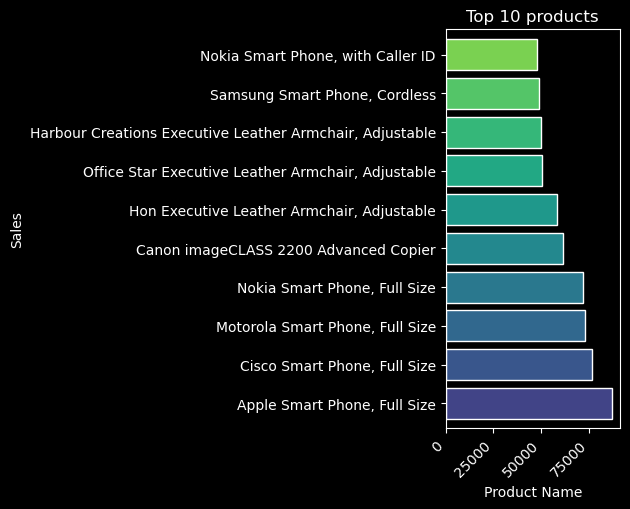

In [8]:
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(top_product)))
plt.style.use('dark_background')
top_product.plot(kind='barh',color=colors,edgecolor='white',width=.8)
plt.xticks(rotation =45,ha='right')
plt.tight_layout()
plt.xlabel("Product Name")
plt.ylabel("Sales")
plt.title("Top 10 products")
plt.savefig("Top 10 products")

# Sales Distribution by category

In [9]:
category_dis = gs_data.groupby('Category')['Sales'].sum().sort_values(ascending=False).head(10)

In [10]:
category_dis

Category
Technology         4744691.0
Furniture          4110884.0
Office Supplies    3787330.0
Name: Sales, dtype: float64

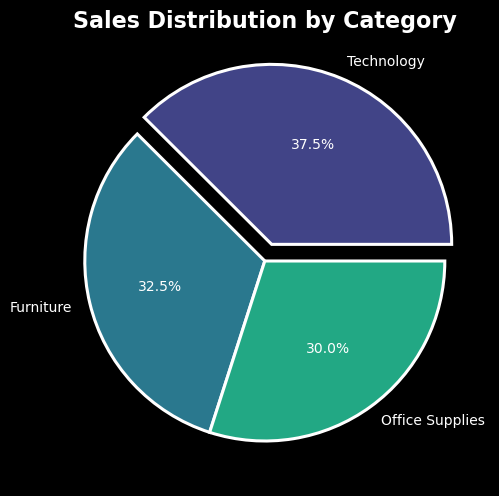

In [11]:


explode = [0.1,0,0] # as i already knew as it has only 3 category
colors=plt.cm.viridis(np.linspace(0.2,0.6,len(category_dis)))  
plt.style.use('dark_background')
category_dis.plot(kind='pie',colors=colors, explode = explode,autopct='%1.1f%%', wedgeprops ={'edgecolor':'white','linewidth':2.2})
plt.tight_layout()
plt.title("Sales Distribution by Category", fontsize=16, fontweight='bold')
plt.ylabel(' ')
plt.savefig("Sales Distribution by category.png")

# Sales trend over time 

i will convert data type using `pd.to_datetime()` 

In [12]:
gs_data['Order.Date']=pd.to_datetime(gs_data['Order.Date'])

In [13]:
(print(gs_data['Order.Date'].dtype))

datetime64[ns]


<module 'matplotlib.pyplot' from 'E:\\ibu\\Code\\Anaconda\\Lib\\site-packages\\matplotlib\\pyplot.py'>

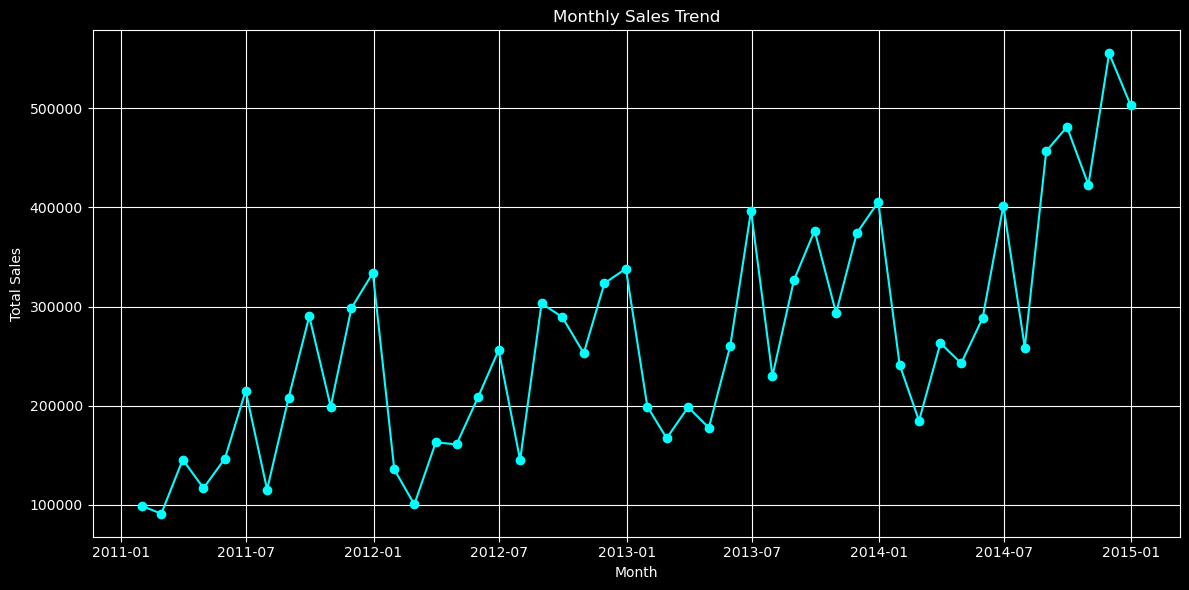

In [14]:
monthly_sales = gs_data.set_index('Order.Date')['Sales'].resample('ME').sum().reset_index()
import numpy as np
maxx=np.argmax(monthly_sales['Sales'])

plt.figure(figsize=(12,6))
plt.plot(monthly_sales['Order.Date'], monthly_sales['Sales'], marker='o',color="cyan")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend")
plt.savefig("monthly_sals.png")
plt.tight_layout()
plt.grid()
plt
